In [1]:
import pandas as pd
import numpy as np

from util import CombinedPreprocessor
from cross_validation import RandomCV, GroupKFoldCV, SpatialPlusCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from IPython.display import display
np.random.seed(41)

### 6/18/2020, 6/16/2021, 6/15/2022 LOFO

In [2]:
indices_6182020 = pd.read_csv("Datasets/Indices_Combined/2020/June_18_2020_New.csv")
indices_6162021 = pd.read_csv("Datasets/Indices_Combined/2021/June_16_2021.csv")
indices_6152022 = pd.read_csv("Datasets/Indices_Combined/2022/June_15_2022.csv")
processor = CombinedPreprocessor()

temp = pd.DataFrame(columns=indices_6162021.columns)

X_train, X_test, y_train, y_test, train_coordinates, test_coordinates = processor.transform(indices_6152022, temp, indices_6182020)

random_validator_lofo = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results = random_validator_lofo.results(X_train, X_test, y_train, y_test)
gkf_results = gkf_validator.results(X_train, X_test, y_train, y_test)
sp_results = sp_validator.results(X_train, X_test, y_train, y_test)

display(rndm_results, gkf_results, sp_results)

/Users/danielchvat/Documents/UWEC REU/util/Preprocessing.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.train_validate = pd.concat([self.df1_, self.df2_]).reset_index(drop=True)


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,RNDM_CV_LOFO,0.134993,0.255152
1,LR,RNDM_TEST_LOFO,0.988176,-4.281691
2,RF,RNDM_CV_LOFO,0.103771,0.565663
3,RF,RNDM_TEST_LOFO,0.887946,-3.264597
4,XGB,RNDM_CV_LOFO,0.102514,0.575074
5,XGB,RNDM_TEST_LOFO,0.884063,-3.227383


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,GKF_CV_LOFO,0.298564,-14.607032
1,LR,GKF_TEST_LOFO,0.988176,-4.281691
2,RF,GKF_CV_LOFO,0.159304,-1.857184
3,RF,GKF_TEST_LOFO,0.887946,-3.264597
4,XGB,GKF_CV_LOFO,0.152182,-1.559922
5,XGB,GKF_TEST_LOFO,0.884063,-3.227383


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG,RMSE STD,R2 STD
0,LR,SP_CV_LOFO,0.500984,-48.176658,0.589241,83.345246
1,LR,SP_TEST_LOFO,0.988176,-4.281691,0.000000,0.000000
2,RF,SP_CV_LOFO,0.136287,-0.002239,0.023685,0.557886
3,RF,SP_TEST_LOFO,0.887946,-3.264597,0.000000,0.000000
4,XGB,SP_CV_LOFO,0.141492,-0.094280,0.023097,0.624026
5,XGB,SP_TEST_LOFO,0.884063,-3.227383,0.000000,0.000000


In [5]:
indices_6182020 = pd.read_csv("Datasets/Indices_Combined/2020/June_18_2020_New.csv")
indices_6162021 = pd.read_csv("Datasets/Indices_Combined/2021/June_16_2021.csv")
indices_6152022 = pd.read_csv("Datasets/Indices_Combined/2022/June_15_2022.csv")
processor = CombinedPreprocessor()

X_train, X_test, y_train, y_test, train_coordinates, test_coordinates = processor.transform(indices_6162021, indices_6152022, indices_6182020)

random_validator_lofo = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results = random_validator_lofo.results(X_train, X_test, y_train, y_test)
gkf_results = gkf_validator.results(X_train, X_test, y_train, y_test)
sp_results = sp_validator.results(X_train, X_test, y_train, y_test)

display(rndm_results, gkf_results, sp_results)

,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,RNDM_CV_LOFO,0.117173,0.572709
1,LR,RNDM_TEST_LOFO,0.325034,-2.144299
2,RF,RNDM_CV_LOFO,0.072554,0.836367
3,RF,RNDM_TEST_LOFO,0.321402,-2.074412
4,XGB,RNDM_CV_LOFO,0.075250,0.823872
5,XGB,RNDM_TEST_LOFO,0.331765,-2.275877


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,GKF_CV_LOFO,0.232877,-10.764385
1,LR,GKF_TEST_LOFO,0.325034,-2.144299
2,RF,GKF_CV_LOFO,0.117459,-0.104278
3,RF,GKF_TEST_LOFO,0.321402,-2.074412
4,XGB,GKF_CV_LOFO,0.114793,-0.082613
5,XGB,GKF_TEST_LOFO,0.331765,-2.275877


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,SP_CV_LOFO,0.416660,-16.888082
1,LR,SP_TEST_LOFO,0.325034,-2.144299
2,RF,SP_CV_LOFO,0.131192,-1.162205
3,RF,SP_TEST_LOFO,0.321402,-2.074412
4,XGB,SP_CV_LOFO,0.136735,-1.187044
5,XGB,SP_TEST_LOFO,0.331765,-2.275877


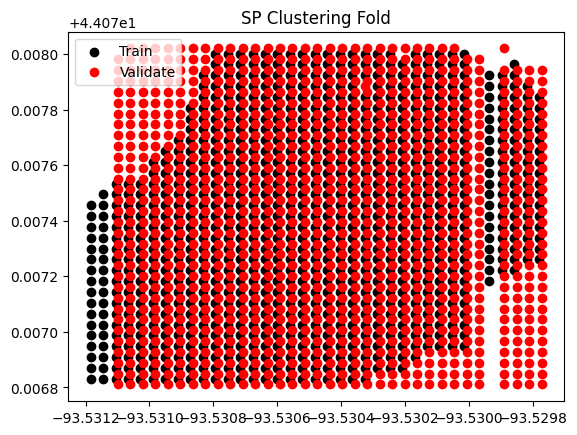

Train Samples   :  937
Validate Samples:  1079
LR Fold CV RMSE Scores:  [1.13582753 0.16817041 0.22454343 0.13810039]
LR Fold CV R2 Scores  :  [-41.97577599 -11.74602864 -11.3953416   -2.43518315]
RF Fold CV RMSE Scores:  [0.32169929 0.0926639  0.05897828 0.05142532]
RF Fold CV R2 Scores  :  [-2.44745924 -2.86987487  0.14485065  0.52366315]


In [6]:
# gkf_validator.display_fold(0,train_coordinates)
sp_validator.display_fold(0, train_coordinates)

### 6/23/2020, 6/22/2021, 6/23/2022

In [10]:
indices_6232020 = pd.read_csv("Datasets/Indices_Combined/2020/June_23_2020_New.csv")
indices_6222021 = pd.read_csv("Datasets/Indices_Combined/2021/June_22_2021.csv")
indices_6232022 = pd.read_csv("Datasets/Indices_Combined/2022/June_23_2022.csv")

processor2 = CombinedPreprocessor()

X_train2, X_test2, y_train2, y_test2, train_coordinates2, test_coordinates2 = processor2.transform(indices_6222021, temp, indices_6232020)

random_validator2 = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator2 = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator2 = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results2 = random_validator2.results(X_train2, X_test2, y_train2, y_test2)
gkf_results2 = gkf_validator2.results(X_train2, X_test2, y_train2, y_test2)
sp_results2 = sp_validator2.results(X_train2, X_test2, y_train2, y_test2)

display(rndm_results2, gkf_results2, sp_results2)

/Users/danielchvat/Documents/UWEC REU/util/Preprocessing.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.train_validate = pd.concat([self.df1_, self.df2_]).reset_index(drop=True)


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,RNDM_CV_LOFO,0.122357,0.495089
1,LR,RNDM_TEST_LOFO,0.638820,-11.145721
2,RF,RNDM_CV_LOFO,0.093466,0.705293
3,RF,RNDM_TEST_LOFO,0.203163,-0.228442
4,XGB,RNDM_CV_LOFO,0.096796,0.683385
5,XGB,RNDM_TEST_LOFO,0.312268,-1.902160


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,GKF_CV_LOFO,0.196522,-0.658010
1,LR,GKF_TEST_LOFO,0.638820,-11.145721
2,RF,GKF_CV_LOFO,0.131929,0.330229
3,RF,GKF_TEST_LOFO,0.203163,-0.228442
4,XGB,GKF_CV_LOFO,0.140562,0.222385
5,XGB,GKF_TEST_LOFO,0.312268,-1.902160


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,SP_CV_LOFO,0.161173,-0.012151
1,LR,SP_TEST_LOFO,0.638820,-11.145721
2,RF,SP_CV_LOFO,0.112333,0.543764
3,RF,SP_TEST_LOFO,0.203163,-0.228442
4,XGB,SP_CV_LOFO,0.117471,0.501067
5,XGB,SP_TEST_LOFO,0.312268,-1.902160


In [4]:
indices_6232020 = pd.read_csv("Datasets/Indices_Combined/2020/June_23_2020_New.csv")
indices_6222021 = pd.read_csv("Datasets/Indices_Combined/2021/June_22_2021.csv")
indices_6232022 = pd.read_csv("Datasets/Indices_Combined/2022/June_23_2022.csv")

processor2 = CombinedPreprocessor()

X_train2, X_test2, y_train2, y_test2, train_coordinates2, test_coordinates2 = processor2.transform(indices_6222021, indices_6232022, indices_6232020)

random_validator2 = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator2 = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator2 = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results2 = random_validator2.results(X_train2, X_test2, y_train2, y_test2)
gkf_results2 = gkf_validator2.results(X_train2, X_test2, y_train2, y_test2)
sp_results2 = sp_validator2.results(X_train2, X_test2, y_train2, y_test2)

display(rndm_results2, gkf_results2, sp_results2)

,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,RNDM_CV_LOFO,0.109948,0.624011
1,LR,RNDM_TEST_LOFO,0.253090,-0.906406
2,RF,RNDM_CV_LOFO,0.074438,0.827726
3,RF,RNDM_TEST_LOFO,0.318799,-2.024826
4,XGB,RNDM_CV_LOFO,0.077535,0.813165
5,XGB,RNDM_TEST_LOFO,0.346459,-2.572478


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,GKF_CV_LOFO,0.131835,-0.157004
1,LR,GKF_TEST_LOFO,0.253090,-0.906406
2,RF,GKF_CV_LOFO,0.105574,0.406132
3,RF,GKF_TEST_LOFO,0.318799,-2.024826
4,XGB,GKF_CV_LOFO,0.099504,0.457295
5,XGB,GKF_TEST_LOFO,0.346459,-2.572478


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,SP_CV_LOFO,0.135751,-0.666329
1,LR,SP_TEST_LOFO,0.253090,-0.906406
2,RF,SP_CV_LOFO,0.099287,0.342300
3,RF,SP_TEST_LOFO,0.318799,-2.024826
4,XGB,SP_CV_LOFO,0.106581,0.310797
5,XGB,SP_TEST_LOFO,0.346459,-2.572478


### 6/30/2020, 6/30/2021, 6/28/2022

In [16]:
indices_6302020 = pd.read_csv("Datasets/Indices_Combined/2020/June_30_2020_New.csv")
indices_6302021 = pd.read_csv("Datasets/Indices_Combined/2021/June_30_2021.csv")
indices_6282022 = pd.read_csv("Datasets/Indices_Combined/2022/June_28_2022.csv")

processor3 = CombinedPreprocessor()

X_train3, X_test3, y_train3, y_test3, train_coordinates3, test_coordinates3 = processor3.transform(indices_6302021, temp, indices_6302020)

random_validator3 = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator3 = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator3 = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results3 = random_validator3.results(X_train3, X_test3, y_train3, y_test3)
gkf_results3 = gkf_validator3.results(X_train3, X_test3, y_train3, y_test3)
sp_results3 = sp_validator3.results(X_train3, X_test3, y_train3, y_test3)

display(rndm_results3, gkf_results3, sp_results3)

/Users/danielchvat/Documents/UWEC REU/util/Preprocessing.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.train_validate = pd.concat([self.df1_, self.df2_]).reset_index(drop=True)


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,RNDM_CV_LOFO,0.120894,0.507555
1,LR,RNDM_TEST_LOFO,0.530681,-7.381727
2,RF,RNDM_CV_LOFO,0.097240,0.681163
3,RF,RNDM_TEST_LOFO,0.249501,-0.852727
4,XGB,RNDM_CV_LOFO,0.103310,0.640131
5,XGB,RNDM_TEST_LOFO,0.245134,-0.788433


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,GKF_CV_LOFO,0.185986,-0.543365
1,LR,GKF_TEST_LOFO,0.530681,-7.381727
2,RF,GKF_CV_LOFO,0.138228,0.255581
3,RF,GKF_TEST_LOFO,0.249501,-0.852727
4,XGB,GKF_CV_LOFO,0.145325,0.161055
5,XGB,GKF_TEST_LOFO,0.245134,-0.788433


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,SP_CV_LOFO,0.287220,-5.128816
1,LR,SP_TEST_LOFO,0.530681,-7.381727
2,RF,SP_CV_LOFO,0.119848,0.460048
3,RF,SP_TEST_LOFO,0.249501,-0.852727
4,XGB,SP_CV_LOFO,0.123052,0.436007
5,XGB,SP_TEST_LOFO,0.245134,-0.788433


In [5]:
indices_6302020 = pd.read_csv("Datasets/Indices_Combined/2020/June_30_2020_New.csv")
indices_6302021 = pd.read_csv("Datasets/Indices_Combined/2021/June_30_2021.csv")
indices_6282022 = pd.read_csv("Datasets/Indices_Combined/2022/June_28_2022.csv")

processor3 = CombinedPreprocessor()

X_train3, X_test3, y_train3, y_test3, train_coordinates3, test_coordinates3 = processor3.transform(indices_6302021, indices_6282022, indices_6302020)

random_validator3 = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator3 = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator3 = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results3 = random_validator3.results(X_train3, X_test3, y_train3, y_test3)
gkf_results3 = gkf_validator3.results(X_train3, X_test3, y_train3, y_test3)
sp_results3 = sp_validator3.results(X_train3, X_test3, y_train3, y_test3)

display(rndm_results3, gkf_results3, sp_results3)

,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,RNDM_CV_LOFO,0.112814,0.603847
1,LR,RNDM_TEST_LOFO,0.270354,-1.175354
2,RF,RNDM_CV_LOFO,0.077482,0.813127
3,RF,RNDM_TEST_LOFO,0.267494,-1.129581
4,XGB,RNDM_CV_LOFO,0.079073,0.805576
5,XGB,RNDM_TEST_LOFO,0.289705,-1.497916


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,GKF_CV_LOFO,0.228248,-6.776925
1,LR,GKF_TEST_LOFO,0.270354,-1.175354
2,RF,GKF_CV_LOFO,0.139840,-0.443427
3,RF,GKF_TEST_LOFO,0.267494,-1.129581
4,XGB,GKF_CV_LOFO,0.148484,-0.767742
5,XGB,GKF_TEST_LOFO,0.289705,-1.497916


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,SP_CV_LOFO,0.248644,-3.382436
1,LR,SP_TEST_LOFO,0.270354,-1.175354
2,RF,SP_CV_LOFO,0.129022,0.094369
3,RF,SP_TEST_LOFO,0.267494,-1.129581
4,XGB,SP_CV_LOFO,0.144711,-0.151339
5,XGB,SP_TEST_LOFO,0.289705,-1.497916


In [2]:
indices_6182020 = pd.read_csv("Datasets/Indices_Combined/2020/June_18_2020_New.csv")
indices_6232020 = pd.read_csv("Datasets/Indices_Combined/2020/June_23_2020_New.csv")
indices_6302020 = pd.read_csv("Datasets/Indices_Combined/2020/June_30_2020_New.csv")
indices_7062020 = pd.read_csv("Datasets/Indices_Combined/2020/July_6_2020_New.csv")

processor = CombinedPreprocessor()

temp = pd.concat([indices_6232020, indices_6302020])

X_train, X_test, y_train, y_test, train_coordinates, test_coordinates = processor.transform(indices_6182020, temp, indices_7062020)

random_validator = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results = random_validator.results(X_train, X_test, y_train, y_test)
gkf_results = gkf_validator.results(X_train, X_test, y_train, y_test)
sp_results = sp_validator.results(X_train, X_test, y_train, y_test)

display(rndm_results, gkf_results, sp_results)

,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,RNDM_CV_LOFO,0.170573,0.358360
1,LR,RNDM_TEST_LOFO,0.216222,-0.016128
2,RF,RNDM_CV_LOFO,0.100944,0.775326
3,RF,RNDM_TEST_LOFO,0.175674,0.329245
4,XGB,RNDM_CV_LOFO,0.105338,0.755292
5,XGB,RNDM_TEST_LOFO,0.163720,0.417424


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,GKF_CV_LOFO,0.461045,-4.897560
1,LR,GKF_TEST_LOFO,0.216222,-0.016128
2,RF,GKF_CV_LOFO,0.216723,-0.212160
3,RF,GKF_TEST_LOFO,0.175674,0.329245
4,XGB,GKF_CV_LOFO,0.233039,-0.367415
5,XGB,GKF_TEST_LOFO,0.163720,0.417424


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,SP_CV_LOFO,0.507731,-8.336568
1,LR,SP_TEST_LOFO,0.216222,-0.016128
2,RF,SP_CV_LOFO,0.159341,0.355359
3,RF,SP_TEST_LOFO,0.175674,0.329245
4,XGB,SP_CV_LOFO,0.181217,0.144284
5,XGB,SP_TEST_LOFO,0.163720,0.417424


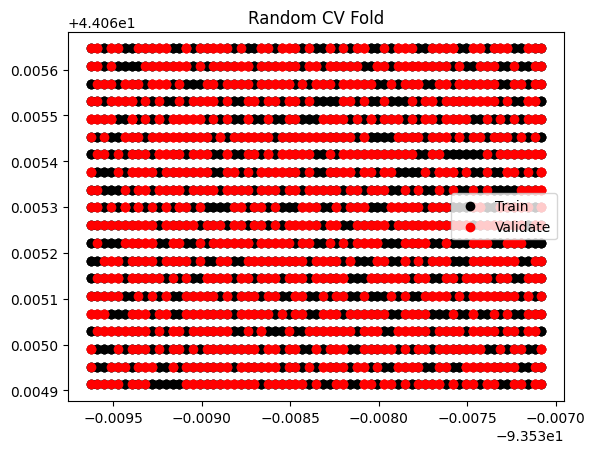

Train Samples   :  2814
Validate Samples:  1206
LR Fold CV RMSE Scores:  [0.16831447 0.1752495  0.17150922 0.1671607  0.17063062]
LR Fold CV R2 Scores  :  [0.36639936 0.33350059 0.36286251 0.39448004 0.33455617]
RF Fold CV RMSE Scores:  [0.09689511 0.10533558 0.10220075 0.1045422  0.09574702]
RF Fold CV R2 Scores  :  [0.7900207  0.75921113 0.77376157 0.76316639 0.79046912]


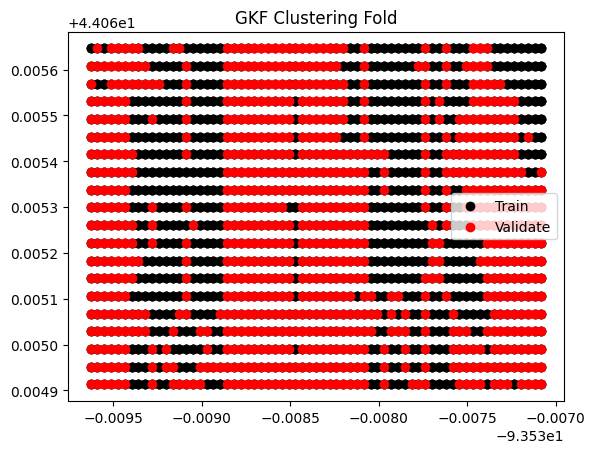

Train Samples   :  3074
Validate Samples:  946
LR Fold RMSE Scores:  [0.8558284  0.42533436 0.21867896 0.34434007]
LR Fold R2 Scores  :  [-14.91927462  -3.26835715  -0.05110794  -1.35150034]
RF Fold RMSE Scores:  [0.36786374 0.13080926 0.12820806 0.24001059]
RF Fold R2 Scores  :  [-1.94119529  0.5962832   0.63870334 -0.14243297]


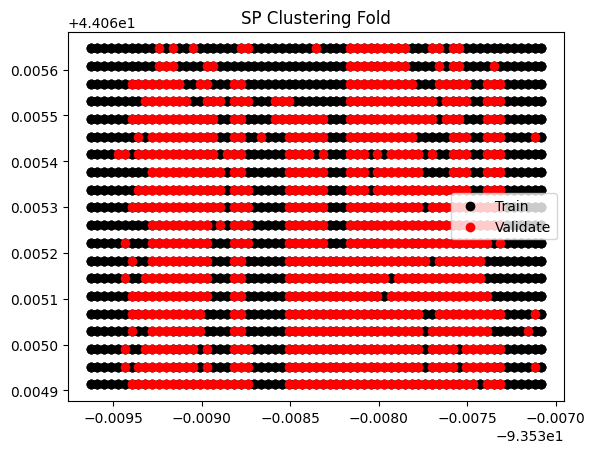

Train Samples   :  3047
Validate Samples:  973
LR Fold CV RMSE Scores:  [1.22489584 0.18189161 0.40689264 0.21724418]
LR Fold CV R2 Scores  :  [-30.22784793   0.3060005   -3.32627357  -0.09815263]
RF Fold CV RMSE Scores:  [0.26614895 0.10744817 0.13500347 0.12876511]
RF Fold CV R2 Scores  :  [-0.47432507  0.7578236   0.52373994  0.6141995 ]


In [7]:
random_validator.display_fold(2, train_coordinates)
gkf_validator.display_fold(2, train_coordinates)
sp_validator.display_fold(2, train_coordinates)

In [26]:
indices_6162021 = pd.read_csv("Datasets/Indices_Combined/2021/June_16_2021.csv")
indices_6222021 = pd.read_csv("Datasets/Indices_Combined/2021/June_22_2021.csv")
indices_6302021 = pd.read_csv("Datasets/Indices_Combined/2021/June_30_2021.csv")
indices_7122021 = pd.read_csv("Datasets/Indices_Combined/2021/July_12_2021.csv")

processor = CombinedPreprocessor()

temp = pd.concat([indices_6222021, indices_6302021])

X_train, X_test, y_train, y_test, train_coordinates, test_coordinates = processor.transform(indices_6162021, temp, indices_7122021)

random_validator_lofo = RandomCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
gkf_validator = GroupKFoldCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})
sp_validator = SpatialPlusCV(models={'LR': LinearRegression(n_jobs=-1), 'RF': RandomForestRegressor(n_jobs=-1, random_state=41), 'XGB': XGBRegressor()})

rndm_results = random_validator_lofo.results(X_train, X_test, y_train, y_test)
gkf_results = gkf_validator.results(X_train, X_test, y_train, y_test)
sp_results = sp_validator.results(X_train, X_test, y_train, y_test)

display(rndm_results, gkf_results, sp_results)

,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,RNDM_CV_LOFO,0.132316,0.411290
1,LR,RNDM_TEST_LOFO,0.270047,-1.431574
2,RF,RNDM_CV_LOFO,0.076704,0.801835
3,RF,RNDM_TEST_LOFO,0.152788,0.221632
4,XGB,RNDM_CV_LOFO,0.080732,0.780626
5,XGB,RNDM_TEST_LOFO,0.165177,0.090275


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,GKF_CV_LOFO,0.180347,-0.259954
1,LR,GKF_TEST_LOFO,0.270047,-1.431574
2,RF,GKF_CV_LOFO,0.110405,0.553595
3,RF,GKF_TEST_LOFO,0.152788,0.221632
4,XGB,GKF_CV_LOFO,0.112272,0.541129
5,XGB,GKF_TEST_LOFO,0.165177,0.090275


,MODEL,CV_METHOD,RMSE_AVG,R2_AVG
0,LR,SP_CV_LOFO,0.151624,0.184878
1,LR,SP_TEST_LOFO,0.270047,-1.431574
2,RF,SP_CV_LOFO,0.108100,0.565564
3,RF,SP_TEST_LOFO,0.152788,0.221632
4,XGB,SP_CV_LOFO,0.115773,0.476245
5,XGB,SP_TEST_LOFO,0.165177,0.090275


In [8]:
X_train

,Red,Green,Blue,BI,GLI,NGRDI,VARI,BGI,ExG,ExR,ExB,ExGR,MGRVI,RGBVI,GRRI,VEG,Elevation(,Moisture(%
0,0.410112,0.396592,0.427936,0.404299,0.281721,0.322727,0.321964,0.724784,0.360707,0.673188,0.744830,0.359109,0.333556,0.281353,0.290458,0.269927,0.671822,0.856624
1,0.195690,0.235810,0.227061,0.216055,0.733691,0.737365,0.718544,0.345658,0.519405,0.260222,0.355870,0.522308,0.748168,0.738171,0.706910,0.715478,0.586567,0.924174
2,0.142486,0.134148,0.135548,0.133070,0.681885,0.648436,0.621983,0.306760,0.269104,0.349479,0.322999,0.270139,0.660857,0.691177,0.613080,0.646231,0.589771,0.919628
3,0.172437,0.179770,0.193915,0.176024,0.637299,0.659892,0.648328,0.447730,0.321334,0.337424,0.462292,0.322697,0.672158,0.640932,0.625022,0.620267,0.379856,0.664865
4,0.350854,0.326978,0.349137,0.336129,0.334941,0.345274,0.337824,0.623891,0.301165,0.652081,0.648812,0.299517,0.356553,0.339729,0.311788,0.311184,0.801226,0.902079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,0.556528,0.938212,0.761534,0.768230,1.113982,1.119173,1.089449,0.091622,2.498835,-0.120958,0.064886,2.513486,1.111029,1.107573,1.141487,1.148061,0.573472,0.666353
4016,0.614995,0.982167,0.820384,0.819516,1.006508,1.022587,0.999898,0.184530,2.446766,-0.024196,0.170441,2.460301,1.021207,1.003656,1.026390,1.026044,0.529237,0.664654
4017,0.593175,0.959689,0.805465,0.799035,1.017454,1.045841,1.026932,0.199511,2.411732,-0.046988,0.184233,2.425334,1.042961,1.013632,1.053765,1.044388,0.486501,0.663226
4018,0.571972,0.934491,0.766048,0.772308,1.060131,1.062371,1.033470,0.122843,2.414785,-0.064340,0.102660,2.428561,1.058376,1.056077,1.073353,1.082648,0.446308,0.659990
